# Kenya Hack - Tanzania Tourism Prediction Challenge by Nairobi Women In Machine Learning Data Science

The Tanzanian tourism sector plays a significant role in the Tanzanian economy, contributing about 17% to the country’s GDP and 25% of all foreign exchange revenues. The sector, which provides direct employment for more than 600,000 people and up to 2 million people indirectly, generated approximately $2.4 billion in 2018 according to government statistics. Tanzania received a record 1.1 million international visitor arrivals in 2014, mostly from Europe, the US and Africa.

Tanzania is the only country in the world which has allocated more than 25% of its total area for wildlife, national parks, and protected areas.There are 16 national parks in Tanzania, 28 game reserves, 44 game-controlled areas, two marine parks and one conservation area.

Tanzania’s tourist attractions include the Serengeti plains, which hosts the largest terrestrial mammal migration in the world; the Ngorongoro Crater, the world’s largest intact volcanic caldera and home to the highest density of big game in Africa; Kilimanjaro, Africa’s highest mountain; and the Mafia Island marine park; among many others. The scenery, topography, rich culture and very friendly people provide for excellent cultural tourism, beach holidays, honeymooning, game hunting, historical and archaeological ventures – and certainly the best wildlife photography safaris in the world.

The objective of this hackathon is to develop a machine learning model to predict what a tourist will spend when visiting Tanzania.The model can be used by different tour operators and the Tanzania Tourism Board to automatically help tourists across the world estimate their expenditure before visiting Tanzania.

In [1]:

import numpy as np 
import pandas as pd 
#
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os
#
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
#
from IPython.display import display
import gc                                                           #memory management
#
import seaborn as sns
#
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#setting styles and aesthetics
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,8)
#
sns.set_style('darkgrid')
#
pd.set_option('display.max_columns', 100)
pd.options.display.max_rows=50
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
submission = pd.read_csv("SampleSubmission.csv")
descp = pd.read_csv("VariableDefinitions.csv")

In [4]:
descp

,Column Name,Definition
0,id,Unique identifier for each tourist
1,country,The country a tourist coming from.
2,age_group,The age group of a tourist.
3,travel_with,The relation of people a tourist travel with t...
4,total_female,Total number of females
5,total_male,Total number of males
6,purpose,The purpose of visiting Tanzania
7,main_activity,The main activity of tourism in Tanzania
8,infor_source,The source of information about tourism in Tan...
9,tour_arrangment,The arrangment of visiting Tanzania


In [5]:
# Check The Shape Of The Data Loaded
print('Train data shape: {} Rows, {} Columns'.format(*train.shape))
display(train.head(3))
#
print('Test data shape: {} Rows, {} Columns'.format(*test.shape))
display(test.head(3))

Train data shape: 4809 Rows, 23 Columns


,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.00,1.00,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,13.00,0.00,Cash,No,Friendly People,"674,602.50"
1,tour_10,UNITED KINGDOM,25-44,NaN,1.00,0.00,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,14.00,7.00,Cash,Yes,"Wonderful Country, Landscape, Nature","3,214,906.50"
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.00,1.00,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,1.00,31.00,Cash,No,Excellent Experience,"3,315,000.00"


Test data shape: 1601 Rows, 22 Columns


,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
0,tour_1,AUSTRALIA,45-64,Spouse,1.00,1.00,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Yes,10,3,Cash,Yes,Wildlife
1,tour_100,SOUTH AFRICA,25-44,Friends/Relatives,0.00,4.00,Business,Wildlife tourism,Tanzania Mission Abroad,Package Tour,Yes,Yes,No,No,No,No,No,13,0,Cash,No,"Wonderful Country, Landscape, Nature"
2,tour_1001,GERMANY,25-44,Friends/Relatives,3.00,0.00,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,7,14,Cash,No,No comments


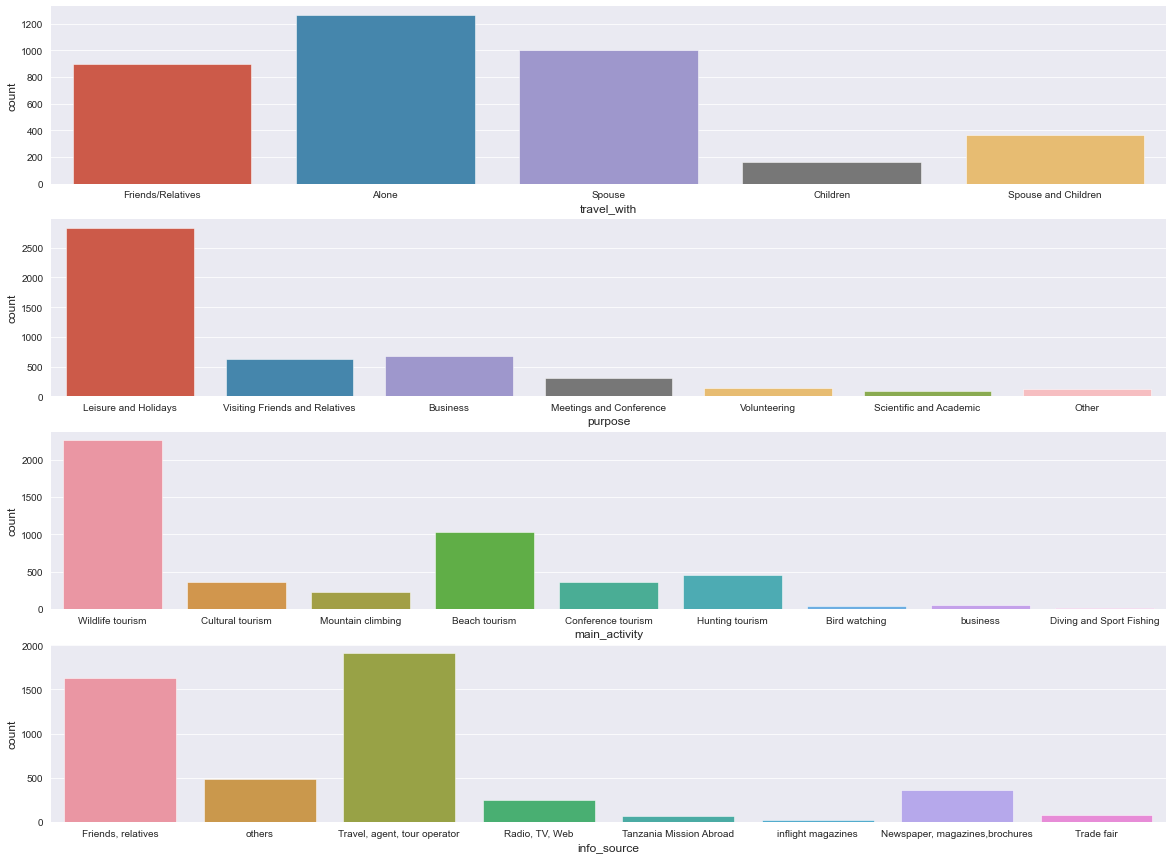

In [6]:
fig, ax = plt.subplots(4,1)
fig.set_size_inches(20, 15)
sns.countplot(train['travel_with'], ax=ax[0])
sns.countplot(train['purpose'], ax=ax[1])
sns.countplot(train['main_activity'], ax=ax[2])
sns.countplot(train['info_source'], ax=ax[3])
sns.despine()
fig.show()

In [7]:
#data types of columns/variables
# Number of each type of column
display("Train data")
display(train.dtypes.value_counts())
display("test data")
display(test.dtypes.value_counts())

'Train data'

object     18
float64     5
dtype: int64

'test data'

object     18
float64     2
int64       2
dtype: int64

In [8]:
#train data pandas profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(train)
profile.to_file(output_file='Train_Profiling_Report.html')
#
#test data pandas profiling
profile = ProfileReport(test)
profile.to_file(output_file='Test_Profiling_Report.html')

Summarize dataset:   0%|          | 0/36 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/35 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
#column/variable names
display("Train data")
display(train.columns)
display("Test data")
display(test.columns)

'Train data'

Index(['ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'payment_mode', 'first_trip_tz', 'most_impressing',
       'total_cost'],
      dtype='object')

'Test data'

Index(['ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'payment_mode', 'first_trip_tz', 'most_impressing'],
      dtype='object')

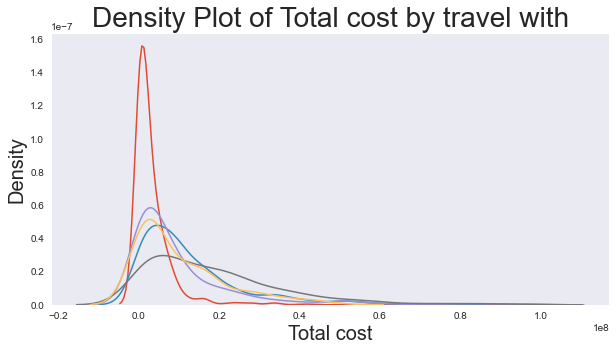

In [10]:
# Create a list of travel with with more than 100 observations
travelwith = train.dropna(subset=['total_cost'])
travelwith = travelwith['travel_with'].value_counts()
travelwith = list(travelwith[travelwith.values > 100].index)
#
# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize
sns.set_style('dark')
figsize(10, 5)
#
for travelwith in travelwith:
  subset = train[train['travel_with'] == travelwith]
  # Density plot of scores
  sns.kdeplot(subset['total_cost'].dropna(), label = travelwith);
  # label the plot
  plt.xlabel('Total cost', size = 20); plt.ylabel('Density', size = 20); 
  plt.title('Density Plot of Total cost by travel with', size = 28);

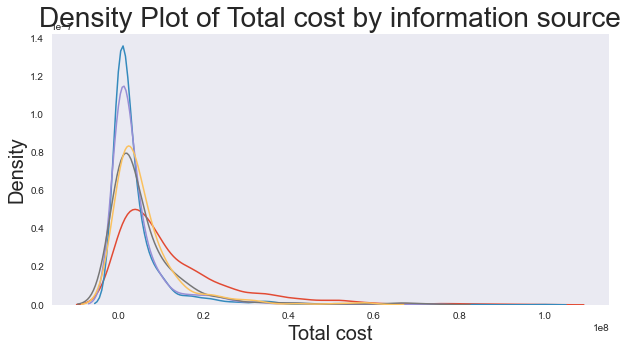

In [11]:
# Create a list of travel with with more than 100 observations
info = train.dropna(subset=['total_cost'])
info = info['info_source'].value_counts()
info = list(info[info.values > 100].index)
#
figsize(10, 5)
#
for info in info:
  subset = train[train['info_source'] == info]
  # Density plot of scores
  sns.kdeplot(subset['total_cost'].dropna(), label = info);
  # label the plot
  plt.xlabel('Total cost', size = 20); plt.ylabel('Density', size = 20); 
  plt.title('Density Plot of Total cost by information source', size = 28);

In [12]:
train['set'] = 'train'
test['set'] = 'test'
#
#merge the two sets of data for data analysis and visualization
data = pd.concat([train,test])
display(data.head(3))
display(data.tail(3))

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost,set
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.00,1.00,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,13.00,0.00,Cash,No,Friendly People,"674,602.50",train
1,tour_10,UNITED KINGDOM,25-44,NaN,1.00,0.00,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,14.00,7.00,Cash,Yes,"Wonderful Country, Landscape, Nature","3,214,906.50",train
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.00,1.00,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,1.00,31.00,Cash,No,Excellent Experience,"3,315,000.00",train


,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost,set
1598,tour_992,FINLAND,25-44,Alone,0.00,1.00,Meetings and Conference,Mountain climbing,"Friends, relatives",Independent,No,No,No,No,No,No,No,6.00,0.00,Cash,Yes,No comments,nan,test
1599,tour_996,SOUTH AFRICA,24-Jan,Alone,0.00,1.00,Business,Beach tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,4.00,0.00,Cash,Yes,Wildlife,nan,test
1600,tour_998,SOUTH AFRICA,25-44,Spouse,1.00,1.00,Leisure and Holidays,Cultural tourism,"Radio, TV, Web",Independent,No,No,No,No,No,No,No,9.00,5.00,Cash,Yes,Friendly People,nan,test


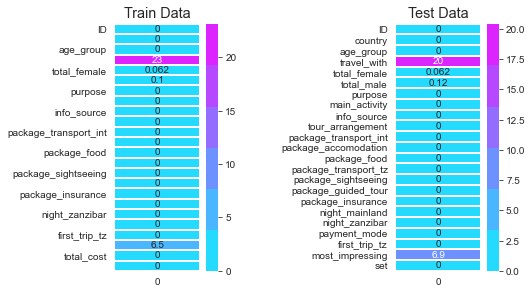

In [13]:
plt.figure(figsize=(12,10))

plt.subplot(231)
sns.heatmap(pd.DataFrame(train.isnull().sum()/train.shape[0]*100),annot=True,
            cmap=sns.color_palette("cool"),linewidth=1,linecolor="white")
plt.title("Train Data")

plt.subplot(232)
sns.heatmap(pd.DataFrame(test.isnull().sum()/test.shape[0]*100),annot=True,
            cmap=sns.color_palette("cool"),linewidth=1,linecolor="white")
plt.title("Test Data")

plt.subplots_adjust(wspace = 1.6)

In [14]:
data.travel_with.fillna('None',inplace=True)
data.total_female.fillna(data.total_female.mean(),inplace = True)
data.total_male.fillna(data.total_male.mean(),inplace = True)
data.first_trip_tz.fillna('None', inplace = True)

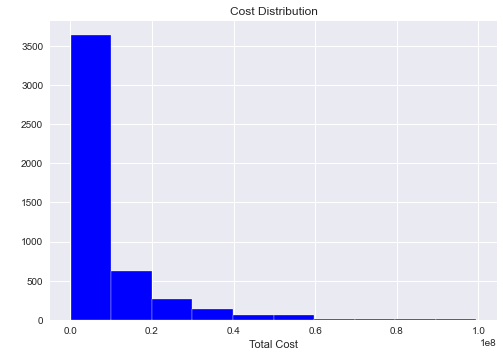

In [15]:
#Now, lets move on to EDA. 
#The purpose of EDA process is to find anomalies, patterns, trends, or relationships. #EDA generally starts out with 
#a high-level overview, and then narrows in to specific parts of the dataset once as we find interesting areas to examine. 

#Lets start off by focusing on the energy score since its the target variable. 
figsize(8, 8)
#
# Histogram of the total cost
plt.style.use('seaborn')
plt.hist(data['total_cost'].dropna(), color = 'blue');
plt.xlabel('Total Cost'); plt.ylabel(' '); 
plt.title('Cost Distribution');

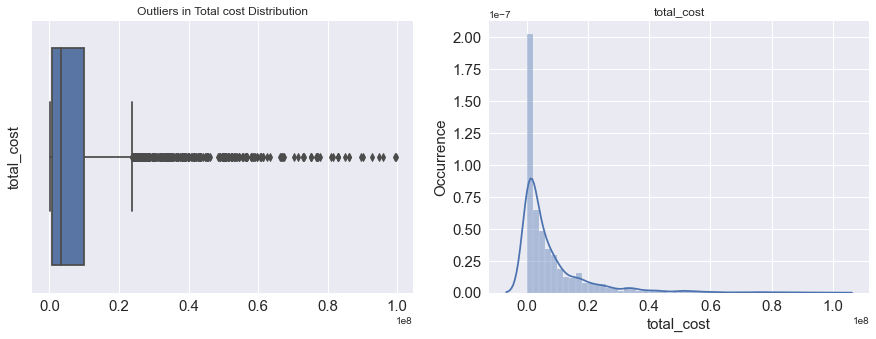

In [16]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.boxplot(x='total_cost',data=data,orient='v',ax=ax1)
ax1.set_xlabel(' ',fontsize=15)
ax1.set_ylabel('total_cost',fontsize=15)
ax1.set_title('Outliers in Total cost Distribution')
ax1.tick_params(labelsize=15)

sns.distplot(data['total_cost'],ax=ax2)
ax2.set_xlabel('total_cost',fontsize=15)
ax2.set_ylabel('Occurrence',fontsize=15)
ax2.set_title("total_cost")
sns.despine(ax=ax2)
ax2.tick_params(labelsize=15)

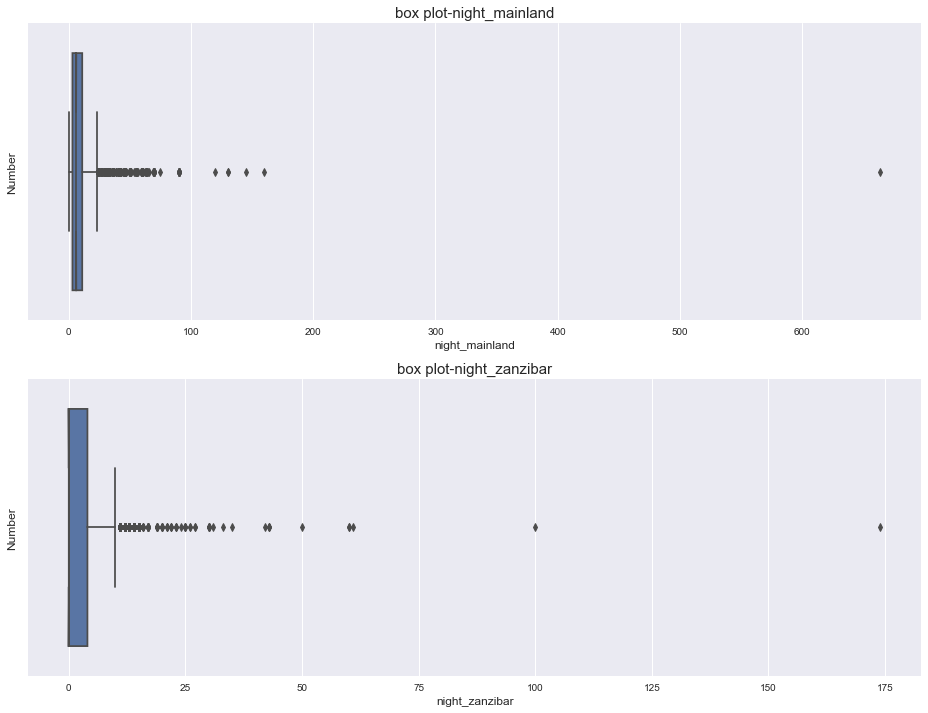

In [17]:
#checking for outliers using box plot
col_names = ['night_mainland', 'night_zanzibar']
fig, ax=plt.subplots(len(col_names), figsize=(16,12))
for i, col_val in enumerate(col_names):
    sns.boxplot(data[col_val], notch= True, ax=ax[i])
    ax[i].set_title ('box plot-'+ col_val, fontsize= 15)
    ax[i].set_xlabel(col_val, fontsize= 12)
    ax[i].set_ylabel('Number', fontsize= 12)

plt.show()  

### Feature Engineering

In [18]:
data.drop_duplicates(subset=data.columns, keep='last', inplace=True)

### Numerical variables/columns

In [19]:
#define a function for treating outliers
def treat_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print('First quantile: ', Q1)
    print('Third quantile: ', Q3)
    print('IQR: ', IQR)
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    print('Lower bound: ', lower_bound, 'Upper bound: ', upper_bound)

**1. Total Cost**

In [20]:
treat_outlier(data, 'total_cost')

First quantile:  812175.0
Third quantile:  9945000.0
IQR:  9132825.0
Lower bound:  -12887062.5 Upper bound:  23644237.5


In [21]:
data = data[(data['total_cost'] > -12887062.5) & (data['total_cost'] < 23644237.5)]

**2. Night Mainland**

In [22]:
treat_outlier(data, 'night_mainland')

First quantile:  2.0
Third quantile:  11.0
IQR:  9.0
Lower bound:  -11.5 Upper bound:  24.5


In [23]:
data = data[(data['night_mainland'] > -11.5) & (data['night_mainland'] < 24.5)]

**3. Night Zanzibar**

In [24]:
treat_outlier(data, 'night_zanzibar')

First quantile:  0.0
Third quantile:  4.0
IQR:  4.0
Lower bound:  -6.0 Upper bound:  10.0


In [25]:
data = data[(data['night_zanzibar'] > -6.0) & (data['night_zanzibar'] < 10.0)]

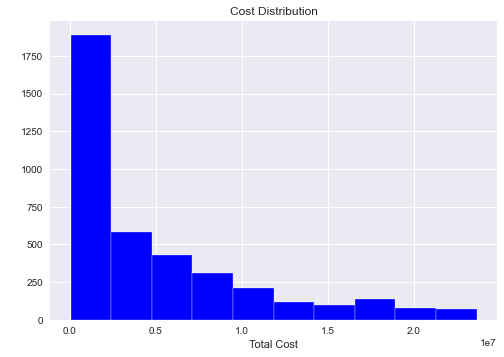

In [26]:
figsize(8, 8)
#
# Histogram of the total cost
plt.style.use('seaborn')
plt.hist(data['total_cost'].dropna(), color = 'blue');
plt.xlabel('Total Cost'); plt.ylabel(' '); 
plt.title('Cost Distribution');

In [28]:
#encode string variables 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#
data['age_group'] = le.fit_transform(data['age_group'])
data['package_transport_int'] = le.fit_transform(data['package_transport_int'])
data['package_accomodation'] = le.fit_transform(data['package_accomodation'])
data['package_food'] = le.fit_transform(data['package_food'])
data['package_transport_tz'] = le.fit_transform(data['package_transport_tz'])
data['package_sightseeing'] = le.fit_transform(data['package_sightseeing'])
data['package_guided_tour'] = le.fit_transform(data['package_guided_tour'])
data['package_insurance'] = le.fit_transform(data['package_insurance'])
data['first_trip_tz'] = le.fit_transform(data['first_trip_tz'])
data['country'] = le.fit_transform(data['country'])

### Dummify columns/Variables

In [29]:
columns_to_transform = ['tour_arrangement','travel_with','purpose','main_activity','info_source','most_impressing','payment_mode']
data = pd.get_dummies( data, columns = columns_to_transform, drop_first=True)
#
display(data.head(3))
display(data.tail(3))

,ID,country,age_group,total_female,total_male,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,total_cost,set,tour_arrangement_Package Tour,travel_with_Children,travel_with_Friends/Relatives,travel_with_None,travel_with_Spouse,travel_with_Spouse and Children,purpose_Leisure and Holidays,purpose_Meetings and Conference,purpose_Other,purpose_Scientific and Academic,purpose_Visiting Friends and Relatives,purpose_Volunteering,main_activity_Bird watching,main_activity_Conference tourism,main_activity_Cultural tourism,main_activity_Diving and Sport Fishing,main_activity_Hunting tourism,main_activity_Mountain climbing,main_activity_Wildlife tourism,main_activity_business,"info_source_Newspaper, magazines,brochures","info_source_Radio, TV, Web",info_source_Tanzania Mission Abroad,info_source_Trade fair,"info_source_Travel, agent, tour operator",info_source_inflight magazines,info_source_others,most_impressing_Excellent Experience,most_impressing_Friendly People,most_impressing_Good service,most_impressing_No comments,most_impressing_Satisfies and Hope Come Back,"most_impressing_Wonderful Country, Landscape, Nature",payment_mode_Credit Card,payment_mode_Other,payment_mode_Travellers Cheque
0,tour_0,80,2,1.00,1.00,0,0,0,0,0,0,0,13.00,0.00,0,"674,602.50",train,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,tour_10,89,1,1.00,0.00,0,0,0,0,0,0,0,14.00,7.00,1,"3,214,906.50",train,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,tour_1002,89,1,1.00,1.00,0,1,1,1,1,1,0,11.00,0.00,1,"7,790,250.00",train,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


,ID,country,age_group,total_female,total_male,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,total_cost,set,tour_arrangement_Package Tour,travel_with_Children,travel_with_Friends/Relatives,travel_with_None,travel_with_Spouse,travel_with_Spouse and Children,purpose_Leisure and Holidays,purpose_Meetings and Conference,purpose_Other,purpose_Scientific and Academic,purpose_Visiting Friends and Relatives,purpose_Volunteering,main_activity_Bird watching,main_activity_Conference tourism,main_activity_Cultural tourism,main_activity_Diving and Sport Fishing,main_activity_Hunting tourism,main_activity_Mountain climbing,main_activity_Wildlife tourism,main_activity_business,"info_source_Newspaper, magazines,brochures","info_source_Radio, TV, Web",info_source_Tanzania Mission Abroad,info_source_Trade fair,"info_source_Travel, agent, tour operator",info_source_inflight magazines,info_source_others,most_impressing_Excellent Experience,most_impressing_Friendly People,most_impressing_Good service,most_impressing_No comments,most_impressing_Satisfies and Hope Come Back,"most_impressing_Wonderful Country, Landscape, Nature",payment_mode_Credit Card,payment_mode_Other,payment_mode_Travellers Cheque
4806,tour_995,57,0,1.00,0.00,0,0,0,0,0,0,0,3.00,7.00,1,"2,246,636.70",train,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4807,tour_997,74,1,1.00,1.00,1,1,1,0,0,0,0,5.00,0.00,0,"1,160,250.00",train,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
4808,tour_999,89,1,1.00,1.00,1,1,1,1,1,1,0,4.00,7.00,1,"13,260,000.00",train,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


In [30]:
## convert float dtypes to int
data["total_female"] = data['total_female'].astype('int')
data["total_male"] = data['total_male'].astype('int')
data["night_mainland"] = data['night_mainland'].astype('int')
data["night_zanzibar"] = data['night_zanzibar'].astype('int')

In [31]:
#feature engineering
data["total_persons"] = data["total_female"] + data["total_male"]
#
data["total_nights_spent"] = data["night_mainland"] + data["night_zanzibar"]
#
int_cols = ["night_mainland", "night_zanzibar", "total_female", "total_male", "total_persons", "total_nights_spent"]
for col in int_cols:
    freq = data[col].value_counts().to_dict()
    data[col + '_freq_code'] = data[col].map(freq)

In [32]:
data['night_zanzibar_freq_code'] = le.fit_transform(data['night_zanzibar_freq_code'])
data['night_mainland_freq_code'] = le.fit_transform(data['night_mainland_freq_code'])
data['total_female_freq_code'] = le.fit_transform(data['total_female_freq_code'])
data['total_male_freq_code'] = le.fit_transform(data['total_male_freq_code'])
data['total_persons_freq_code'] = le.fit_transform(data['total_persons_freq_code'])
data['total_nights_spent_freq_code'] = le.fit_transform(data['total_nights_spent_freq_code'])

### Check for Correlation among variables/columns

In [42]:
pd.options.display.max_rows = 100
corr_df = pd.DataFrame(data=data.corr()['total_cost'].sort_values())
display('Correlation Coefficients')
display(corr_df)

'Correlation Coefficients'

,total_cost
total_persons_freq_code,-0.27
main_activity_Hunting tourism,-0.22
purpose_Visiting Friends and Relatives,-0.21
travel_with_None,-0.18
night_zanzibar_freq_code,-0.18
night_mainland_freq_code,-0.16
total_nights_spent_freq_code,-0.15
main_activity_Mountain climbing,-0.14
purpose_Meetings and Conference,-0.14
purpose_Other,-0.12


To account for possible non-linear relationships, we can take square root and natural log transformations of the features and then calculate the correlation coefficients with the total cost.

Not all of these features are likely to be important for predicting the score, and several of these features are also redundant because they are highly correlated. E.g.,...

In [43]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model 
        to generalize and improves the interpretability of the model.

    Inputs: 
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output: 
        dataframe that contains only the non-highly-collinear features
    '''

    # Dont want to remove correlations between Energy Star Score
    y = x['total_cost']
    x = x.drop(columns = ['total_cost'])

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)

    # Add the score back in to the data
    x['total_cost'] = y

    return x

In [44]:
# Remove the collinear features above a specified correlation coefficient
features = remove_collinear_features(data, 0.7);

package_food | package_accomodation | 0.93
package_transport_tz | package_accomodation | 0.86
package_transport_tz | package_food | 0.83
package_sightseeing | package_accomodation | 0.72
package_sightseeing | package_transport_tz | 0.71
package_guided_tour | package_accomodation | 0.75
package_guided_tour | package_food | 0.72
package_guided_tour | package_transport_tz | 0.71
package_guided_tour | package_sightseeing | 0.78
tour_arrangement_Package Tour | package_accomodation | 0.97
tour_arrangement_Package Tour | package_food | 0.92
tour_arrangement_Package Tour | package_transport_tz | 0.85
tour_arrangement_Package Tour | package_sightseeing | 0.72
tour_arrangement_Package Tour | package_guided_tour | 0.74
total_persons | total_female | 0.78
total_persons | total_male | 0.73
total_nights_spent | night_mainland | 0.89
night_mainland_freq_code | night_mainland | 0.87
night_mainland_freq_code | total_nights_spent | 0.8
total_persons_freq_code | total_female | 0.74
total_persons_freq_cod

In [45]:
display(features)

,ID,country,age_group,total_female,total_male,package_transport_int,package_accomodation,package_insurance,night_mainland,night_zanzibar,first_trip_tz,set,travel_with_Children,travel_with_Friends/Relatives,travel_with_None,travel_with_Spouse,travel_with_Spouse and Children,purpose_Leisure and Holidays,purpose_Meetings and Conference,purpose_Other,purpose_Scientific and Academic,purpose_Visiting Friends and Relatives,purpose_Volunteering,main_activity_Bird watching,main_activity_Conference tourism,main_activity_Cultural tourism,main_activity_Diving and Sport Fishing,main_activity_Hunting tourism,main_activity_Mountain climbing,main_activity_Wildlife tourism,main_activity_business,"info_source_Newspaper, magazines,brochures","info_source_Radio, TV, Web",info_source_Tanzania Mission Abroad,info_source_Trade fair,"info_source_Travel, agent, tour operator",info_source_inflight magazines,info_source_others,most_impressing_Excellent Experience,most_impressing_Friendly People,most_impressing_Good service,most_impressing_No comments,most_impressing_Satisfies and Hope Come Back,"most_impressing_Wonderful Country, Landscape, Nature",payment_mode_Credit Card,payment_mode_Other,payment_mode_Travellers Cheque,night_zanzibar_freq_code,total_female_freq_code,total_male_freq_code,total_cost
0,tour_0,80,2,1,1,0,0,0,13,0,0,train,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,8,9,8,"674,602.50"
1,tour_10,89,1,1,0,0,0,0,14,7,1,train,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,7,9,7,"3,214,906.50"
3,tour_1002,89,1,1,1,0,1,0,11,0,1,train,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,8,9,8,"7,790,250.00"
4,tour_1004,10,0,1,0,0,0,0,7,4,1,train,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,6,9,7,"1,657,500.00"
5,tour_1005,89,1,0,1,0,0,0,9,3,1,train,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,8,8,"120,950.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,tour_993,85,2,0,1,0,0,0,2,0,0,train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,8,8,8,"3,315,000.00"
4805,tour_994,90,1,1,1,1,1,1,11,0,1,train,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,8,9,8,"10,690,875.00"
4806,tour_995,57,0,1,0,0,0,0,3,7,1,train,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,7,9,7,"2,246,636.70"
4807,tour_997,74,1,1,1,1,1,0,5,0,0,train,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,8,9,8,"1,160,250.00"


In [33]:
## separate data into train and test
train_df=data[data.total_cost.notnull()].reset_index(drop=True)
test_df=data[data.total_cost.isna()].reset_index(drop=True)

In [34]:
print(train_df.shape)
print(test_df.shape)

(4809, 55)
(1601, 55)


In [35]:
#Modelling
feat_cols = train.drop(["ID","total_cost"],1)
cols = feat_cols.columns
target=train["total_cost"]


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score

In [38]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(train[cols],target, test_size=0.25, random_state = 42)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(3606, 53) (3606,)
(1203, 53) (1203,)


In [40]:
from xgboost import XGBRegressor
xgb=XGBRegressor( n_estimators= 200,learning_rate = 0.05,max_depth =5)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)


In [42]:
from sklearn.metrics import mean_absolute_error 
mae = mean_absolute_error(y_test, y_pred)
print('Error {}'.format(mae))

Error 5093275.928263184


In [44]:
#predict and prepare submission file
sub = test[cols]
predictions_xgb  = xgb.predict(sub)
submission_df = pd.DataFrame({'ID': test.ID, 'total_cost': predictions_xgb})
submission_df.to_csv('submit.csv',index=False)